Median solar size:
9.25
Median Payback Period (Electrification Only)
-121.89382838887735
Median Payback Period (Electrification + Solar + Storage)
24.508039791424558
Min Payback Period (Electrification + Solar + Storage)
18.313277547954492
Max Payback Period (Electrification + Solar + Storage)
31.452177416944203


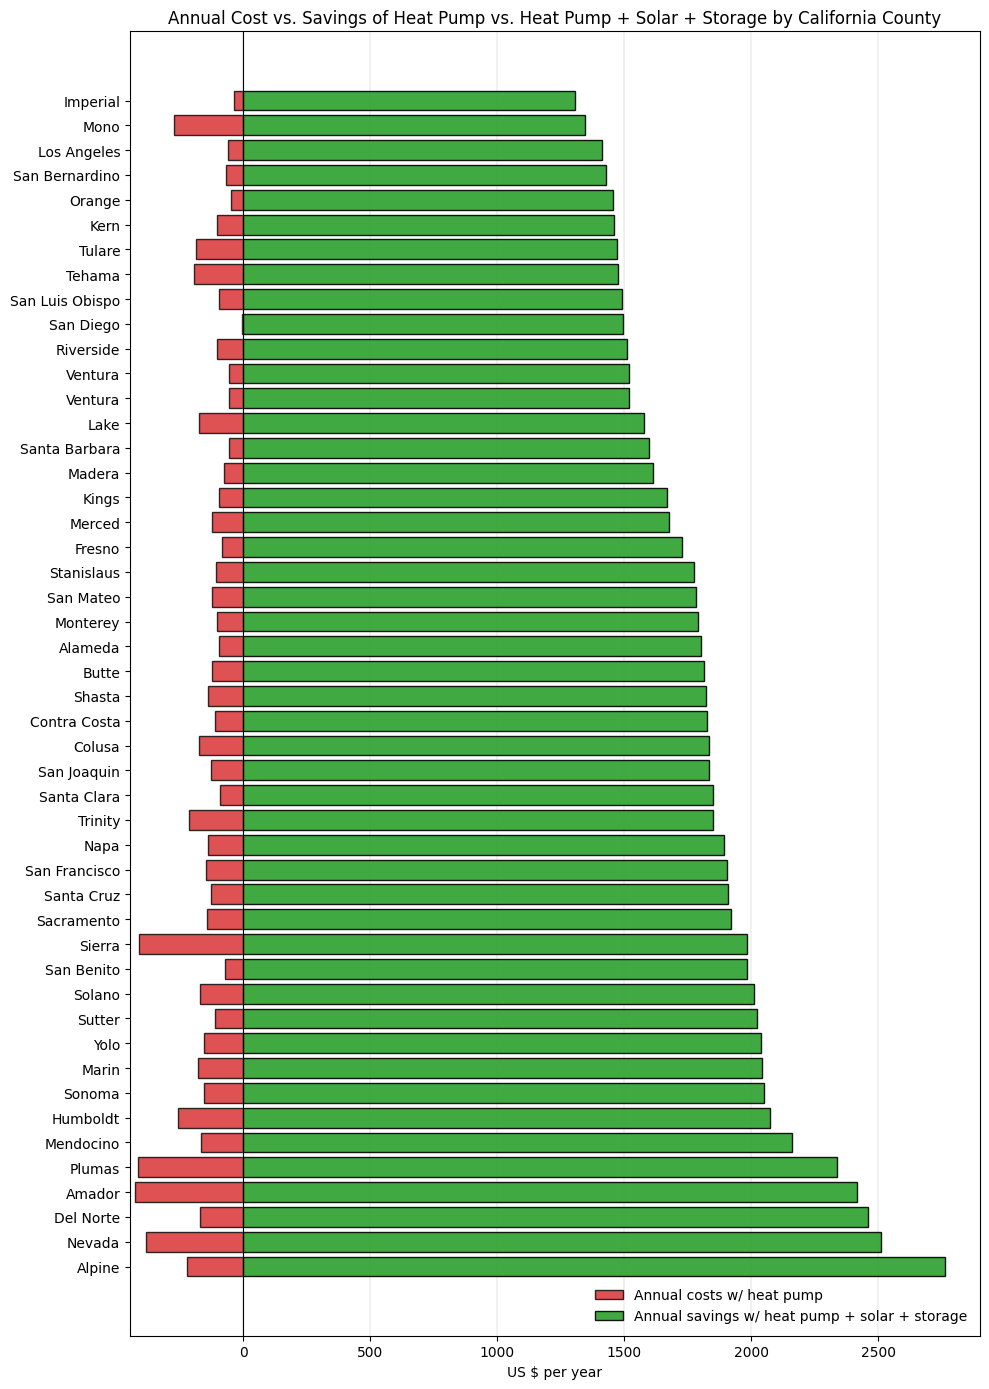

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# ────────────────────────────────────────────────────────────────────
# 1.  Load the GeoJSON
# ────────────────────────────────────────────────────────────────────
gdf = gpd.read_file(
    "../data/loadprofiles/heat_pump/single-family-detached/RESULTS/geojson/heat_pump.geojson"
)

# ────────────────────────────────────────────────────────────────────
# 2.  Tell the code which columns to plot
#     • savings_col → positive numbers, goes to the RIGHT of 0
#     • cost_col    → we’ll flip the sign so it goes to the LEFT of 0
# ────────────────────────────────────────────────────────────────────
savings_col = "Annual Savings (Electrification + Solar + Storage)"
cost_col    = "Annual Savings (Electrification Only)"   # a cost column, not another savings column!

gdf = gdf.dropna(subset=[cost_col, savings_col])

print("Median solar size:")
print(gdf["Solar Size (kW)"].median())

print("Median Payback Period (Electrification Only)")
print(gdf["Payback Period (Electrification Only)"].median())

print("Median Payback Period (Electrification + Solar + Storage)")
print(gdf["Payback Period (Electrification + Solar + Storage)"].median())

print("Min Payback Period (Electrification + Solar + Storage)")
print(gdf["Payback Period (Electrification + Solar + Storage)"].min())

print("Max Payback Period (Electrification + Solar + Storage)")
print(gdf["Payback Period (Electrification + Solar + Storage)"].max())

# make sure every cost bar is negative so it starts at 0 and points left
gdf["Cost (left)"] = -gdf[cost_col].abs()    # abs() guarantees we’re working with magnitudes only

# Sort counties for a tidy chart (largest savings on top)
gdf_sorted = gdf.sort_values(savings_col, ascending=False).reset_index(drop=True)

# ────────────────────────────────────────────────────────────────────
# 3.  Build the diverging horizontal bar chart
# ────────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(10, 14))

y_pos = np.arange(len(gdf_sorted))

# (a) draw the cost bars FIRST (so they sit behind the green ones)
ax.barh(
    y_pos,
    gdf_sorted["Cost (left)"],
    color="tab:red",
    edgecolor="black",
    alpha=0.8,
    label="Annual costs w/ heat pump",
    zorder=1,                # draw under the savings bars
)

# (b) draw the savings bars SECOND
ax.barh(
    y_pos,
    gdf_sorted[savings_col],
    color="tab:green",
    edgecolor="black",
    alpha=0.9,
    label="Annual savings w/ heat pump + solar + storage",
    zorder=2,
)

ax.set_yticks(y_pos)
ax.set_yticklabels(gdf_sorted["NAME"])
ax.set_xlabel("US $ per year")
ax.set_title("Annual Cost vs. Savings of Heat Pump vs. Heat Pump + Solar + Storage by California County")

# Draw a vertical zero-line so it’s crystal-clear where the split is
ax.axvline(0, color="black", linewidth=0.8)

# Pad the x-axis limits a bit so the labels don’t hug the frame
x_max = gdf_sorted[savings_col].max() * 1.05
x_min = gdf_sorted["Cost (left)"].min()  * 1.05  # this is already negative
ax.set_xlim(x_min, x_max)

ax.legend(frameon=False, loc="lower right")
ax.grid(axis="x", linewidth=0.25)

plt.tight_layout()
plt.show()

In [2]:
gdf[savings_col].abs().median()

1817.74524481271

In [3]:
# ────────────────────────────────────────────────────────────────────
# 5.  Median annual delta (cost – savings) across all counties
# ────────────────────────────────────────────────────────────────────
# Step-1: turn the (possibly negative) “cost” numbers into a positive magnitude
annual_cost = gdf[cost_col].abs()

# Step-2: delta per county
gdf["Annual Δ (cost – savings)"] = annual_cost + gdf[savings_col]

# Step-3: median of those deltas
median_delta = gdf["Annual Δ (cost – savings)"].median()

print(f"Median annual delta (cost − savings) for adopting a heat pump with solar + storage: "
      f"${median_delta:,.0f} per year")

Median annual delta (cost − savings) for adopting a heat pump with solar + storage: $1,936 per year


In [4]:
avg_cost    = gdf[cost_col].abs().mean()
avg_savings = gdf[savings_col].mean()

print(f"Average annual cost (heat-pump only):            ${avg_cost:,.0f}")
print(f"Average annual savings (heat-pump + solar + storage): ${avg_savings:,.0f}")

Average annual cost (heat-pump only):            $150
Average annual savings (heat-pump + solar + storage): $1,816
